<a href="https://colab.research.google.com/github/sinhaji14/PYTHON/blob/main/CLUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas scikit-learn matplotlib seaborn


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# loaing the dataset
df = pd.read_csv('/content/credit_card_fraud_dataset.csv')

In [30]:
# Drop irrelevant columns
df = df.drop(['TransactionID', 'TransactionDate'], axis=1)


In [31]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['MerchantID', 'TransactionType', 'Location'], drop_first=True)

In [32]:
# Separate features and labels
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']



In [33]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Train Isolation Forest
iso_forest = IsolationForest(contamination=.01, random_state=42)  # adjust contamination if needed
y_pred = iso_forest.fit_predict(X_scaled)



In [45]:
# Convert prediction: -1 = anomaly (fraud), 1 = normal
y_pred_binary = [1 if x == -1 else 0 for x in y_pred]  # 1 = fraud, 0 = non-fraud

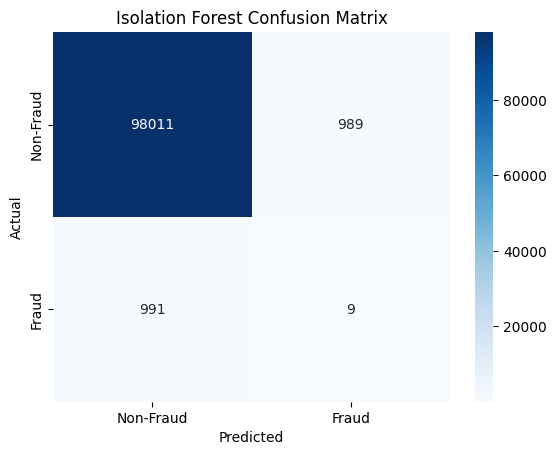

In [46]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Isolation Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



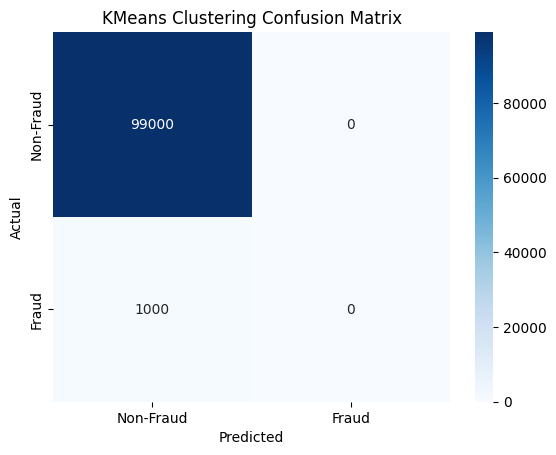

In [27]:
# Plot confusion matrix
cm = confusion_matrix(y, mapped_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('KMeans Clustering Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()